  # Runge Kutta Equations 4. Order



## an adaptive Simulation of the Lotka-Volterra equations
#### created by Sophie Schmeißner, summer term 2020

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.

<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>''')

<IPython.core.display.Javascript object>


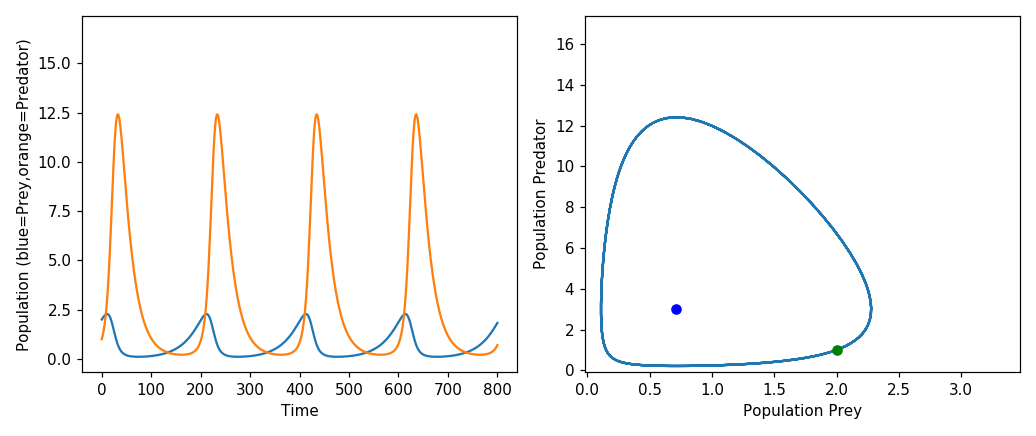

interactive(children=(FloatSlider(value=0.5, description='a_par', max=1.0), FloatSlider(value=0.1, description…

In [13]:
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib notebook


def rk4(fx, fy, x0, y0, x1, n):
    vx = [0] * (n + 1)
    vy = [0] * (n + 1)
    vi = [0] * (n + 1)
    
    vx[0] = x = x0
    vy[0] = y = y0
    for i in range(1, n + 1):
        kx1 = fx(x, y)
        ky1 = fy(x, y)
        
        kx2 = fx(x + 0.5 * h * kx1, y + 0.5 * h * ky1)
        ky2 = fy(x + 0.5 * h * kx1, y + 0.5 * h * ky1)
        
        kx3 = fx(x + 0.5 * h * kx2, y + 0.5 * h * ky2)
        ky3 = fy(x + 0.5 * h * kx2, y + 0.5 * h * ky2)
        
        kx4 = fx(x + h * kx3, y + h * ky3)
        ky4 = fy(x + h * kx3, y + h * ky3)
        
        vx[i] = x = x + h * (kx1 + 2.*kx2 + 2.*kx3 + kx4) / 6.
        vy[i] = y = y + h * (ky1 + 2.*ky2 + 2.*ky3 + ky4) / 6.
        vi[i] = i
        
     
    
    return vx, vy, vi

def fx(x, y):
    return (a-b*y)*x

def fy(x, y):
    return (-m+g*x)*y

def update(a_par=0.5,b_par=0.1, m_par=0.5, g_par=0.5):
    global a
    global b
    global m
    global g
    
    a = a_par
    b = b_par
    m = m_par
    g = g_par
    
    vx, vy, vi = rk4(fx, fy, 2, 1, 10, 800)
    
    line1.set_ydata(vx)
    line2.set_ydata(vy)
    line3.set_xdata(vx)
    line3.set_ydata(vy)
    
    dot1.set_ydata([a/b])
    dot1.set_xdata([m/g])
  

    fig.canvas.draw_idle()
    



a = 0.5 #ReproduktionPrey
b = 0.1 #Mortalityprey
g = 0.5 #ReproduktionPredator
m = 0.5 #MortalityPredator
h = 0.1

vx, vy, vi = rk4(fx, fy, 2, 1, 10, 800)


fig = plt.figure(figsize =(9.5,4))##
ax = fig.add_subplot(1, 2, 1)

ax.set_ylabel('Population (blue=Prey,orange=Predator)')
ax.set_xlabel('Time')






ax2 = fig.add_subplot(1, 2, 2)
ax2.set_ylabel('Population Predator')
ax2.set_xlabel('Population Prey')


line1, = ax.plot(vi, vx)
line2, = ax.plot(vi,vy)

dot1, = ax2.plot([m/g], [a/b], 'bo')

line3, = ax2.plot( vx, vy)
line4, = ax2.plot (2, 1, 'go')




interact(update,
         a_par=(0.0,1.0,.1),
         b_par=(0.0,1.0,.1), 
         m_par=(0.0,1.0,.1),
         g_par=(0.0,1.0,.1)
        )




fig.tight_layout()

plt.show()






In [14]:
#Eigenwerte
import numpy as np
from numpy.linalg import eigvalsh


matrix = np.array([[a, -b], [-m, g]])


print ("Eigenvalues are")
print(eigvalsh(matrix))


Eigenvalues are
[-0.03851648  1.03851648]


## Usage

You can scale the Reproduction- and Mortality-Koefficient of Predator & Prey. The first Plot shows the time development, the second one the Phase Diagram. 


## Theory

These are the Runge-Kutta Methods:

$ \frac {dx} {dt} = f(t,y) =  a *x -b * x*y $

$ y(t_0) = y_0 $


$ x_{n+1} = x_n + \frac{1} {6} *h * (k_1 + 2 k_2 + 2 k_3 + k_4) $

So $x_{t+1}$ is the sum of $x_n$ and the weighted average of $k_{1-4}$, where


$ k_1 = f(t_n, y_n) $ is the slope at the beginning of the interval, using $y$ 

$ k_2 = f(t_n + \frac {h} {2}, y_n + h \frac {k_1} {2}) $ is the slope at the midpoint of the interval, using $y$ and $k_2$

$ k_3 = f(t_n + \frac {h} {2}, y_n + h \frac {k_2} {2}) $ is again the slope of the midpoint, but using $y$ and $k_2$

$ k_4 = f(t_n +h, y_n + h * k_3) $ is the slope of the end of the interval, using $y$ and $k_3$

we use $ h = 0.1 $ and $n = 800 $


 


The System has the Fixpoints 

$ x = \frac {m} {n} $
$ y = \frac {a} {b} $


#### where 

$x$ is the number of Prey (for example, rabbits)

$y$ is the number of Predator (for example, foxes)



$a$ is the Reproduction Koefficient for Prey

$b$ ist the Mortality Koefficient for Prey


$m$ is the Reproduction Koefficient for Predator

$g$ ist the Mortality Koefficient for Predator

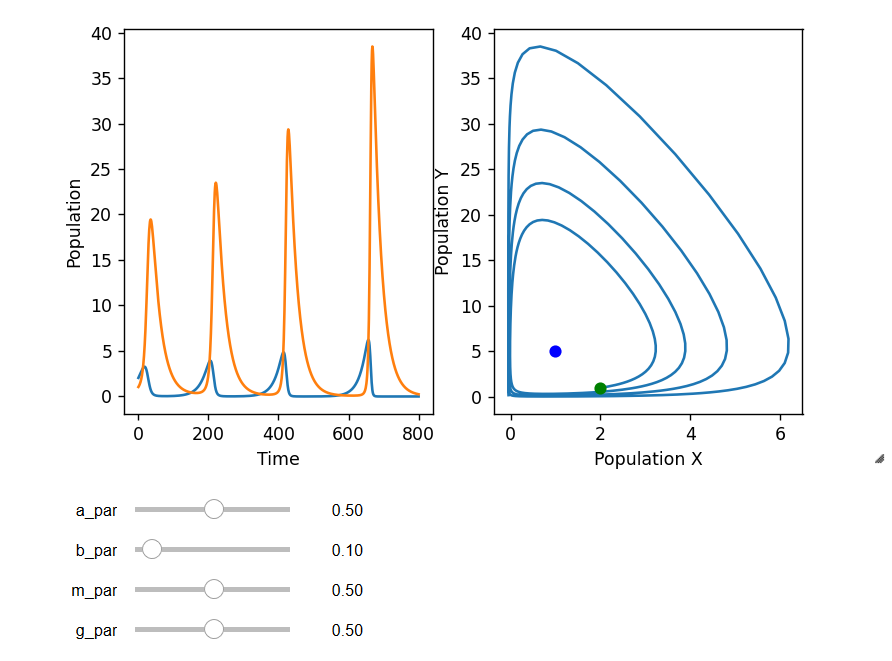